In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from nilearn.plotting import plot_glass_brain, plot_stat_map, plot_roi
from nilearn.image import new_img_like
from nilearn.glm import threshold_stats_img
from nilearn.glm.second_level import SecondLevelModel
from nilearn.reporting import get_clusters_table
import sys
sys.path.append('..')
from analysis.mvpa.loaders import ExperimentDataLoader
from config.paths import DATA_DIR
from plotting.plot import plot_by_nvoxels
import nibabel as nib
from pathlib import Path
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of plotting.plot failed: Traceback (most recent call last):
  File "/home/predatt/giaald/.conda/envs/dyncontext/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/predatt/giaald/.conda/envs/dyncontext/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/home/predatt/giaald/.conda/envs/dyncontext/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/project/3018040.05/dyncontext/notebooks/../plotting/plot.py", line 17, in <module>
    from config.paths import HOME_DIR
ImportError: cannot import name 'HOME_DIR' from 'config.paths' (/project/3018040.05/dyncont

In [78]:
all_cong_maps = []
all_incong_maps = []

all_map_files = sorted(glob('../infocoupl_maps/*.nii.gz'))
all_cong_files = [f for f in all_map_files if 'incongruent' not in f and 'congruent' in f]
all_incong_files = [f for f in all_map_files if 'incongruent' in f]

all_cong_maps = [nib.load(f).get_fdata() for f in all_cong_files]
all_incong_maps = [nib.load(f).get_fdata() for f in all_incong_files]

mean_cong_map = np.nanmean(np.stack(all_cong_maps, axis=0), axis=0)
mean_incong_map = np.nanmean(np.stack(all_incong_maps, axis=0), axis=0)
mean_diff_map = mean_cong_map - mean_incong_map

mean_cong_map = new_img_like(all_map_files[0], mean_cong_map)
mean_incong_map = new_img_like(all_map_files[0], mean_incong_map)
mean_diff_map = new_img_like(all_map_files[0], mean_diff_map)

ValueError: need at least one array to stack

/scratch/giaald/slurm_job_48872576/ipykernel_2625817/2173450169.py:1: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  plot_stat_map(mean_diff_map, vmin=-0.4, vmax=0.4, cmap='cold_hot', draw_cross=False)


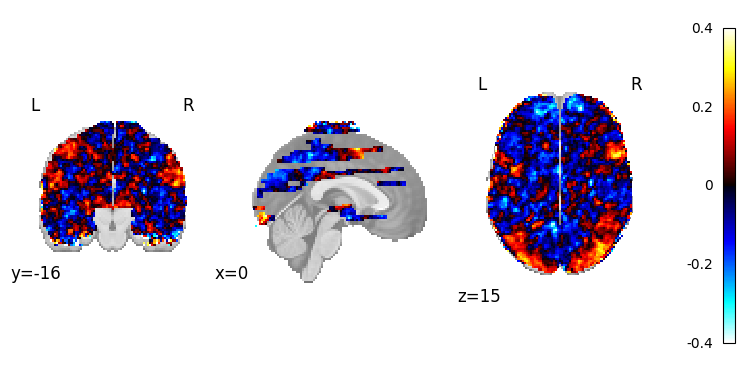

In [ ]:
plot_stat_map(mean_diff_map, vmin=-0.4, vmax=0.4, cmap='cold_hot', draw_cross=False)

In [ ]:
np.stack(all_cong_maps, axis=0).shape

(35, 79, 95, 79)

In [ ]:
n_subjects = 35
subject = [f'sub-{i:03d}' for i in range(1, 36)]
condition_effect = np.hstack(([1] * n_subjects, [-1] * n_subjects))
subject_effect = np.vstack((np.eye(n_subjects), np.eye(n_subjects)))
paired_design_matrix = pd.DataFrame(
    np.hstack((condition_effect[:, np.newaxis], subject_effect)),
    columns=["expected vs unexpected"] + subject,
)

In [ ]:
paired_design_matrix

,expected vs unexpected,sub-001,sub-002,sub-003,sub-004,sub-005,sub-006,sub-007,sub-008,sub-009,...,sub-026,sub-027,sub-028,sub-029,sub-030,sub-031,sub-032,sub-033,sub-034,sub-035
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
66,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
67,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
68,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
second_level_model_paired = SecondLevelModel().fit(
    all_cong_files + all_incong_files, design_matrix=paired_design_matrix
)

In [ ]:
stat_maps_paired = second_level_model_paired.compute_contrast(
    "expected vs unexpected", output_type="all"
)

In [ ]:
thresholded_map, threshold = threshold_stats_img(
    stat_maps_paired["z_score"],
    alpha=0.001,
    height_control="fpr",
    cluster_threshold=10,
    two_sided=False,
)

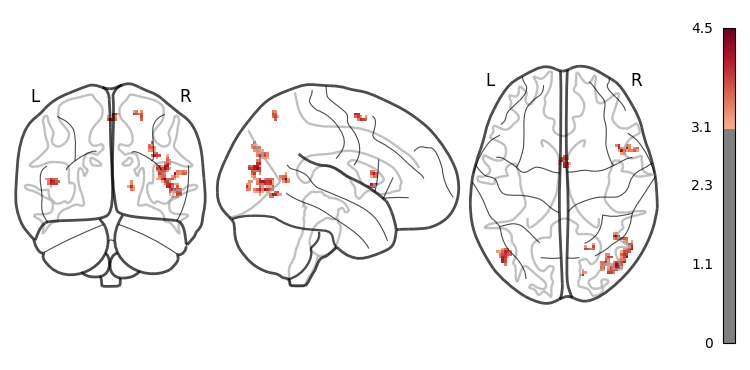

In [ ]:
disp=plot_glass_brain(
    thresholded_map,
    threshold=threshold,
    colorbar=True,
    draw_cross=True,
    plot_abs=False
)

In [ ]:
get_clusters_table(stat_maps_paired['z_score'], threshold,
                   cluster_threshold=10, two_sided=False)

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,42.0,-56.0,10.0,4.514034,184
1,2,42.0,-78.0,18.0,4.243268,488
2,2a,36.0,-84.0,18.0,3.809023,
3,3,50.0,-72.0,2.0,4.157202,272
4,4,46.0,10.0,4.0,4.093135,104
5,5,54.0,-66.0,-2.0,4.080644,144
6,6,-46.0,-74.0,8.0,4.077268,368
7,7,50.0,12.0,14.0,4.055864,152
8,8,34.0,-76.0,28.0,3.986350,296
9,8a,32.0,-80.0,38.0,3.616471,


## Experiment 1

In [ ]:
all_results = glob('../mvpa_results/exp1_*.csv')
results_df = []
for r in all_results:
    results_df.append(pd.read_csv(r))
results_df = pd.concat(results_df)

In [ ]:
results_df.subject_id.nunique()

35

In [ ]:
results_df

,sample_idx,true_label,predicted_label,correct,classifier_info,background,congruency,split,direction,hemisphere,n_voxels,roi,subject_id
0,0,0,1,False,-0.303118,30deg,congruent,1.0,forward,L,100,ba-17-18,sub-006
1,1,0,1,False,-0.351225,30deg,congruent,1.0,forward,L,100,ba-17-18,sub-006
2,2,0,0,True,1.225778,30deg,congruent,1.0,forward,L,100,ba-17-18,sub-006
3,3,0,1,False,-0.375490,30deg,congruent,1.0,forward,L,100,ba-17-18,sub-006
4,4,0,0,True,0.625823,30deg,congruent,1.0,forward,L,100,ba-17-18,sub-006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42235,25,1,0,False,-3.497426,90deg,incongruent,NaN,backward,R,6000,ba-19-37,sub-002
42236,26,1,0,False,-0.800040,90deg,incongruent,NaN,backward,R,6000,ba-19-37,sub-002
42237,27,1,1,True,0.368642,90deg,incongruent,NaN,backward,R,6000,ba-19-37,sub-002
42238,28,1,1,True,1.824141,90deg,incongruent,NaN,backward,R,6000,ba-19-37,sub-002


In [ ]:
results_avg = results_df.groupby(['roi', 'subject_id', 'n_voxels', 'hemisphere', 'congruency']).mean(numeric_only=True).reset_index()

evc_results = results_avg[results_avg['roi']=='ba-17-18']
lvc_results = results_avg[results_avg['roi']=='ba-19-37']

stat_fun(H1): min=1.8386464790995185 max=2.815401797521663
Running initial clustering …
Using 282 thresholds from 0.00 to 2.81 for TFCE computation (h_power=2.00, e_power=0.50)
Found 60 clusters


100%|██████████| Permuting : 99/99 [00:02<00:00,   47.70it/s]
100%|██████████| Permuting : 99/99 [00:02<00:00,   47.68it/s]

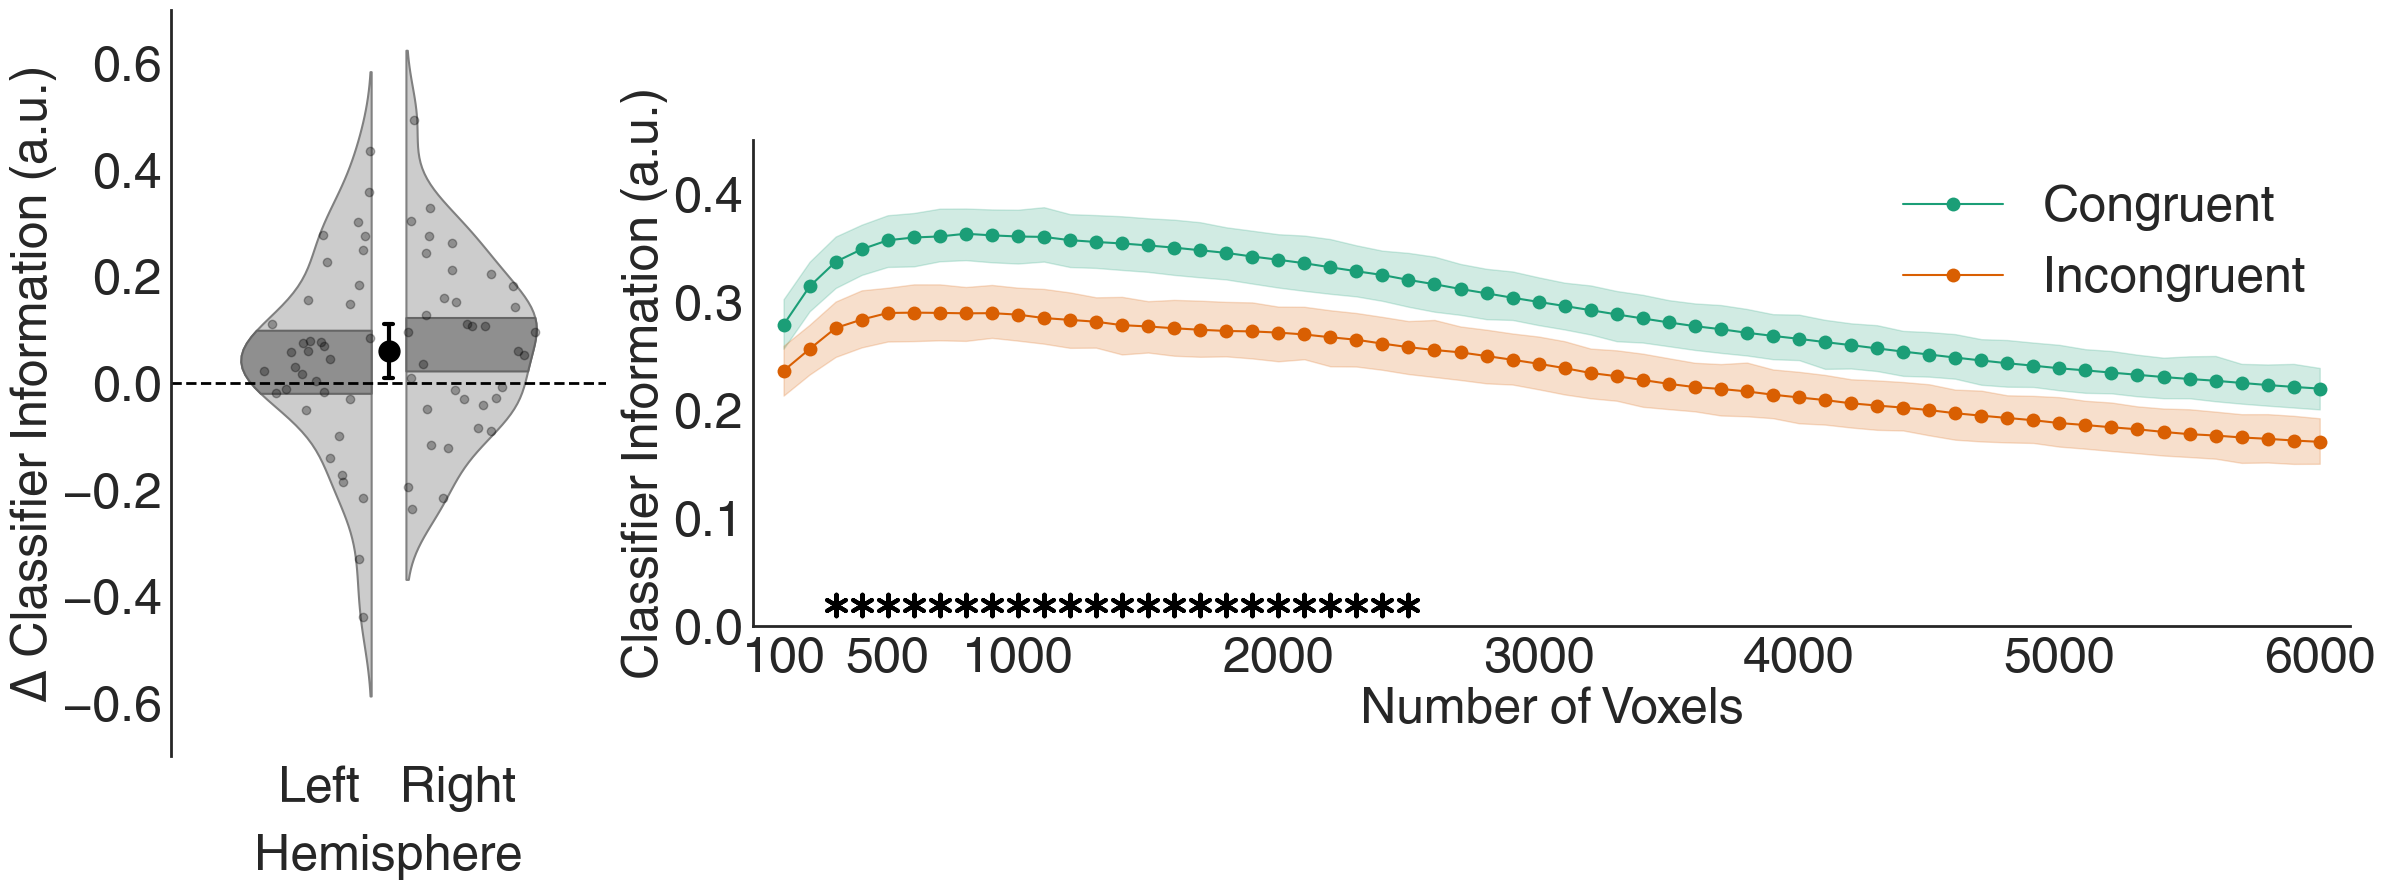

In [ ]:
_ = plot_by_nvoxels(evc_results, n_perms=100, right_part=True)

In [27]:
results_avg

,roi,subject_id,n_voxels,congruency,sample_idx,true_label,predicted_label,correct,classifier_info,split
0,ba-17-18,sub-001,100,congruent,11.954545,0.5,0.511364,0.678030,0.429436,2.0
1,ba-17-18,sub-001,100,incongruent,11.954545,0.5,0.471591,0.517045,0.017709,NaN
2,ba-17-18,sub-001,200,congruent,11.954545,0.5,0.500000,0.715909,0.500945,2.0
3,ba-17-18,sub-001,200,incongruent,11.954545,0.5,0.426136,0.517045,0.111330,NaN
4,ba-17-18,sub-001,300,congruent,11.954545,0.5,0.505682,0.736742,0.543236,2.0
...,...,...,...,...,...,...,...,...,...,...
8395,ba-19-37,sub-035,5800,incongruent,11.954545,0.5,0.460227,0.528409,0.109964,NaN
8396,ba-19-37,sub-035,5900,congruent,11.954545,0.5,0.498106,0.543561,0.092510,2.0
8397,ba-19-37,sub-035,5900,incongruent,11.954545,0.5,0.460227,0.528409,0.106952,NaN
8398,ba-19-37,sub-035,6000,congruent,11.954545,0.5,0.505682,0.551136,0.089972,2.0


<Axes: xlabel='n_voxels', ylabel='classifier_info'>

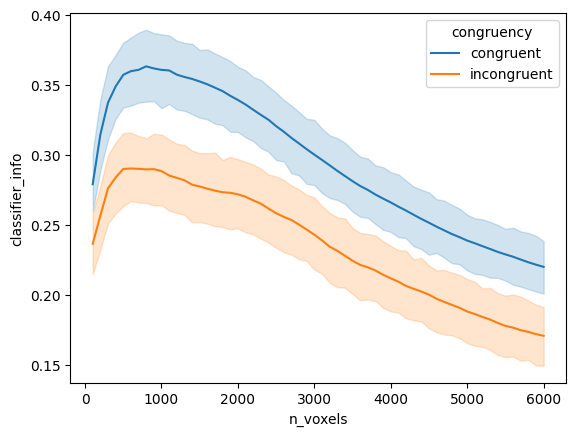

In [28]:
sns.lineplot(data=results_avg[results_avg['roi']=='ba-17-18'], x='n_voxels', y='classifier_info', hue='congruency', errorbar=('ci', 68))

<Axes: xlabel='n_voxels', ylabel='classifier_info'>

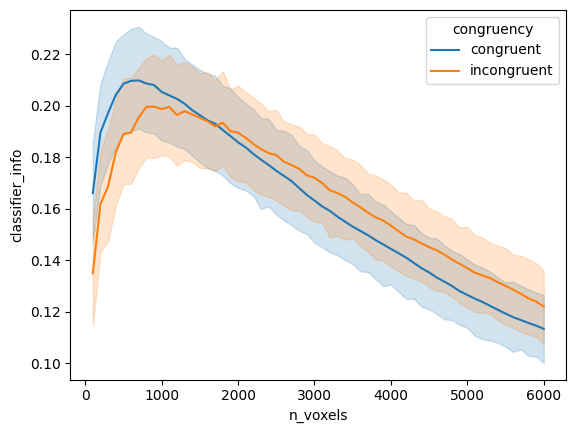

In [9]:
sns.lineplot(data=results_avg[results_avg['roi']=='ba-19-37'], x='n_voxels', y='classifier_info', hue='congruency', errorbar=('ci', 68))

## Experiment 2

In [68]:
exp2_results = glob('../mvpa_results_norm/exp2_*.csv')
exp2_df = []
for r in exp2_results:
    exp2_df.append(pd.read_csv(r))
exp2_df = pd.concat(exp2_df)

In [69]:
exp2_df.subject_id.nunique()

34

In [70]:
exclude_subjects = [f'sub-{s:03d}' for s in [9, 22, 19, 26]]
exp2_df = exp2_df[~exp2_df.subject_id.isin(exclude_subjects)]

In [71]:
exp2_avg_df = exp2_df.groupby(['roi', 'subject_id', 'n_voxels', 'hemisphere']).mean(numeric_only=True).reset_index()

exp2_evc_res = exp2_avg_df[exp2_avg_df['roi']=='ba-17-18']
exp2_lvc_res = exp2_avg_df[exp2_avg_df['roi']=='ba-19-37']

In [72]:
exp2_evc_res[exp2_evc_res['n_voxels']==300].classifier_info.mean()

np.float64(0.055835325394037114)

stat_fun(H1): min=0.7897662609825149 max=2.3186282308039394
Running initial clustering …
Using 232 thresholds from 0.00 to 2.31 for TFCE computation (h_power=2.00, e_power=0.50)
Found 60 clusters


100%|██████████| Permuting : 9999/9999 [03:46<00:00,   44.05it/s]
/project/3018040.05/dyncontext/notebooks/../plotting/plot.py:343: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


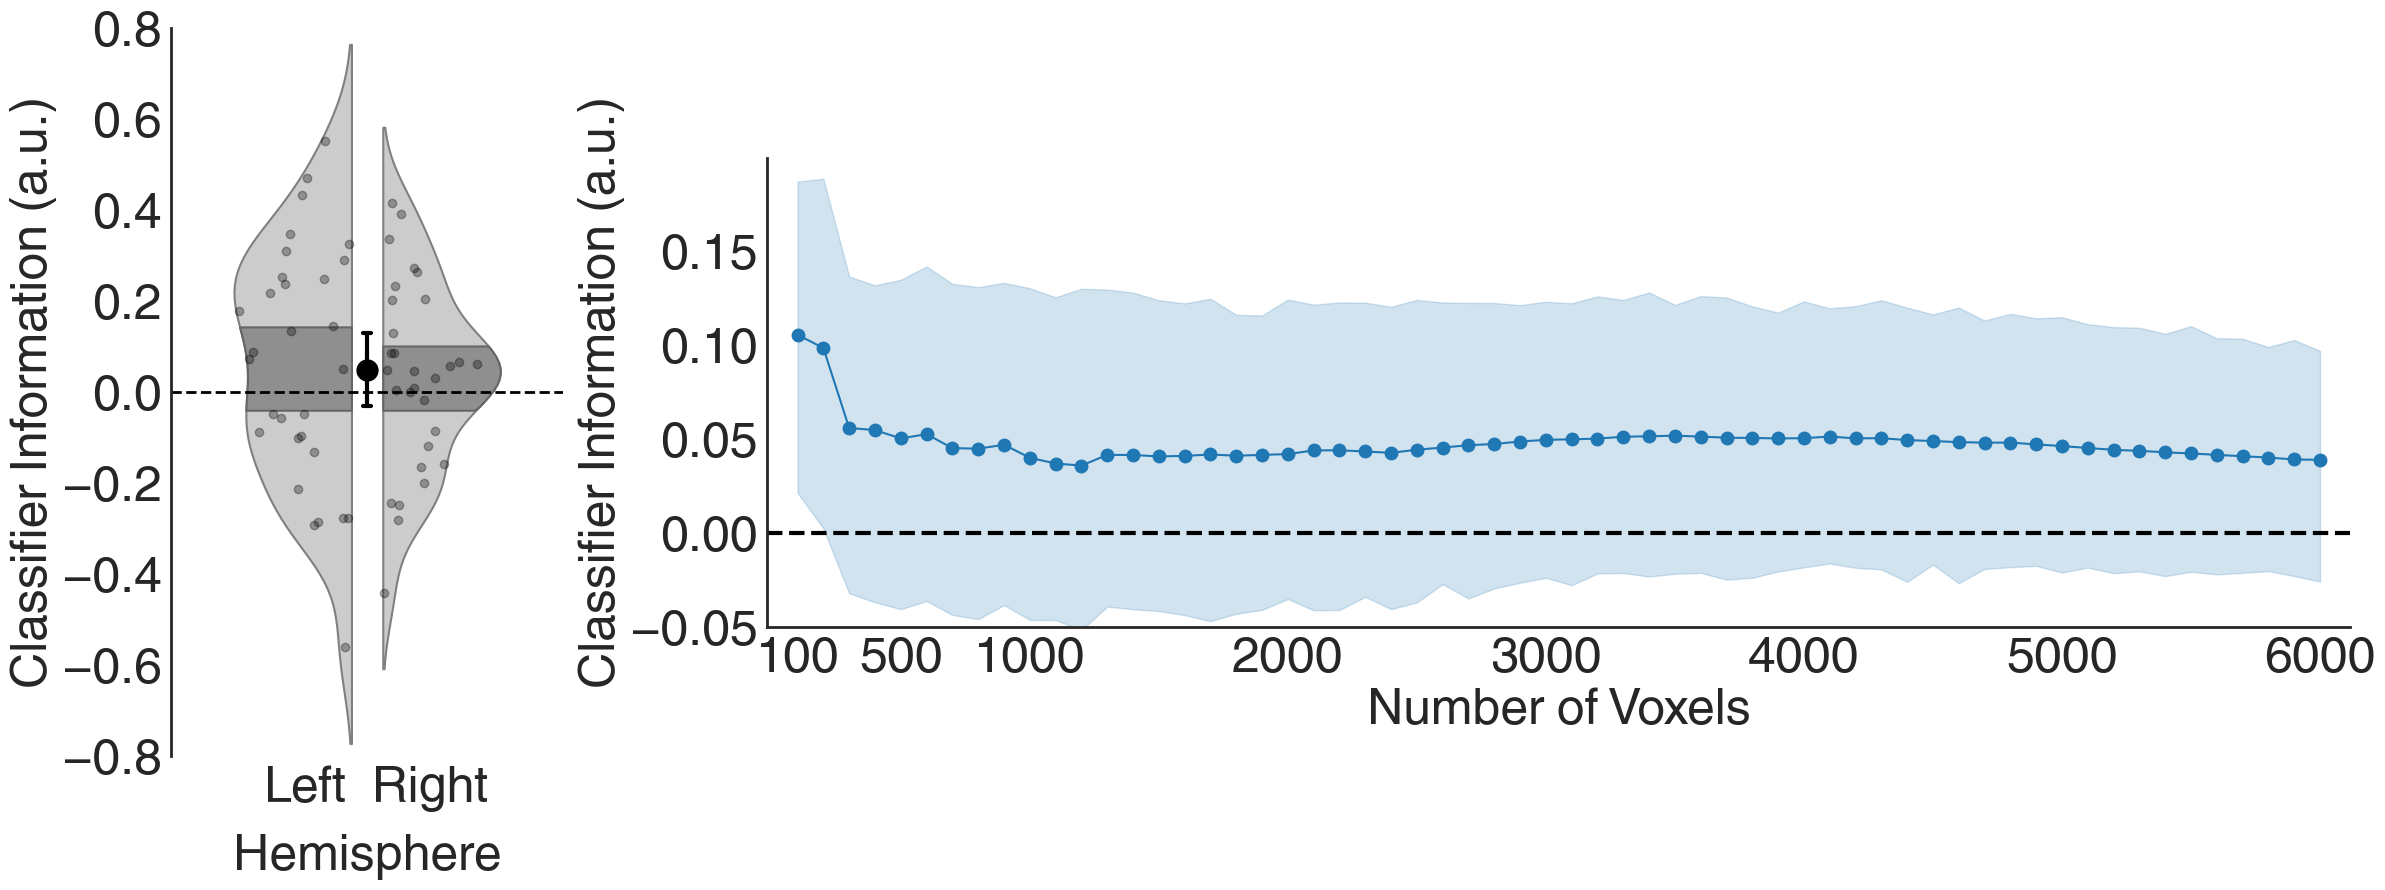

In [73]:
_ = plot_by_nvoxels(exp2_evc_res, experiment=2, n_perms=10000, right_part=True)

stat_fun(H1): min=0.7020679579314296 max=3.33229760179373
Running initial clustering …
Using 334 thresholds from 0.00 to 3.33 for TFCE computation (h_power=2.00, e_power=0.50)
Found 60 clusters


100%|██████████| Permuting : 9999/9999 [04:13<00:00,   39.39it/s]
/project/3018040.05/dyncontext/notebooks/../plotting/plot.py:343: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


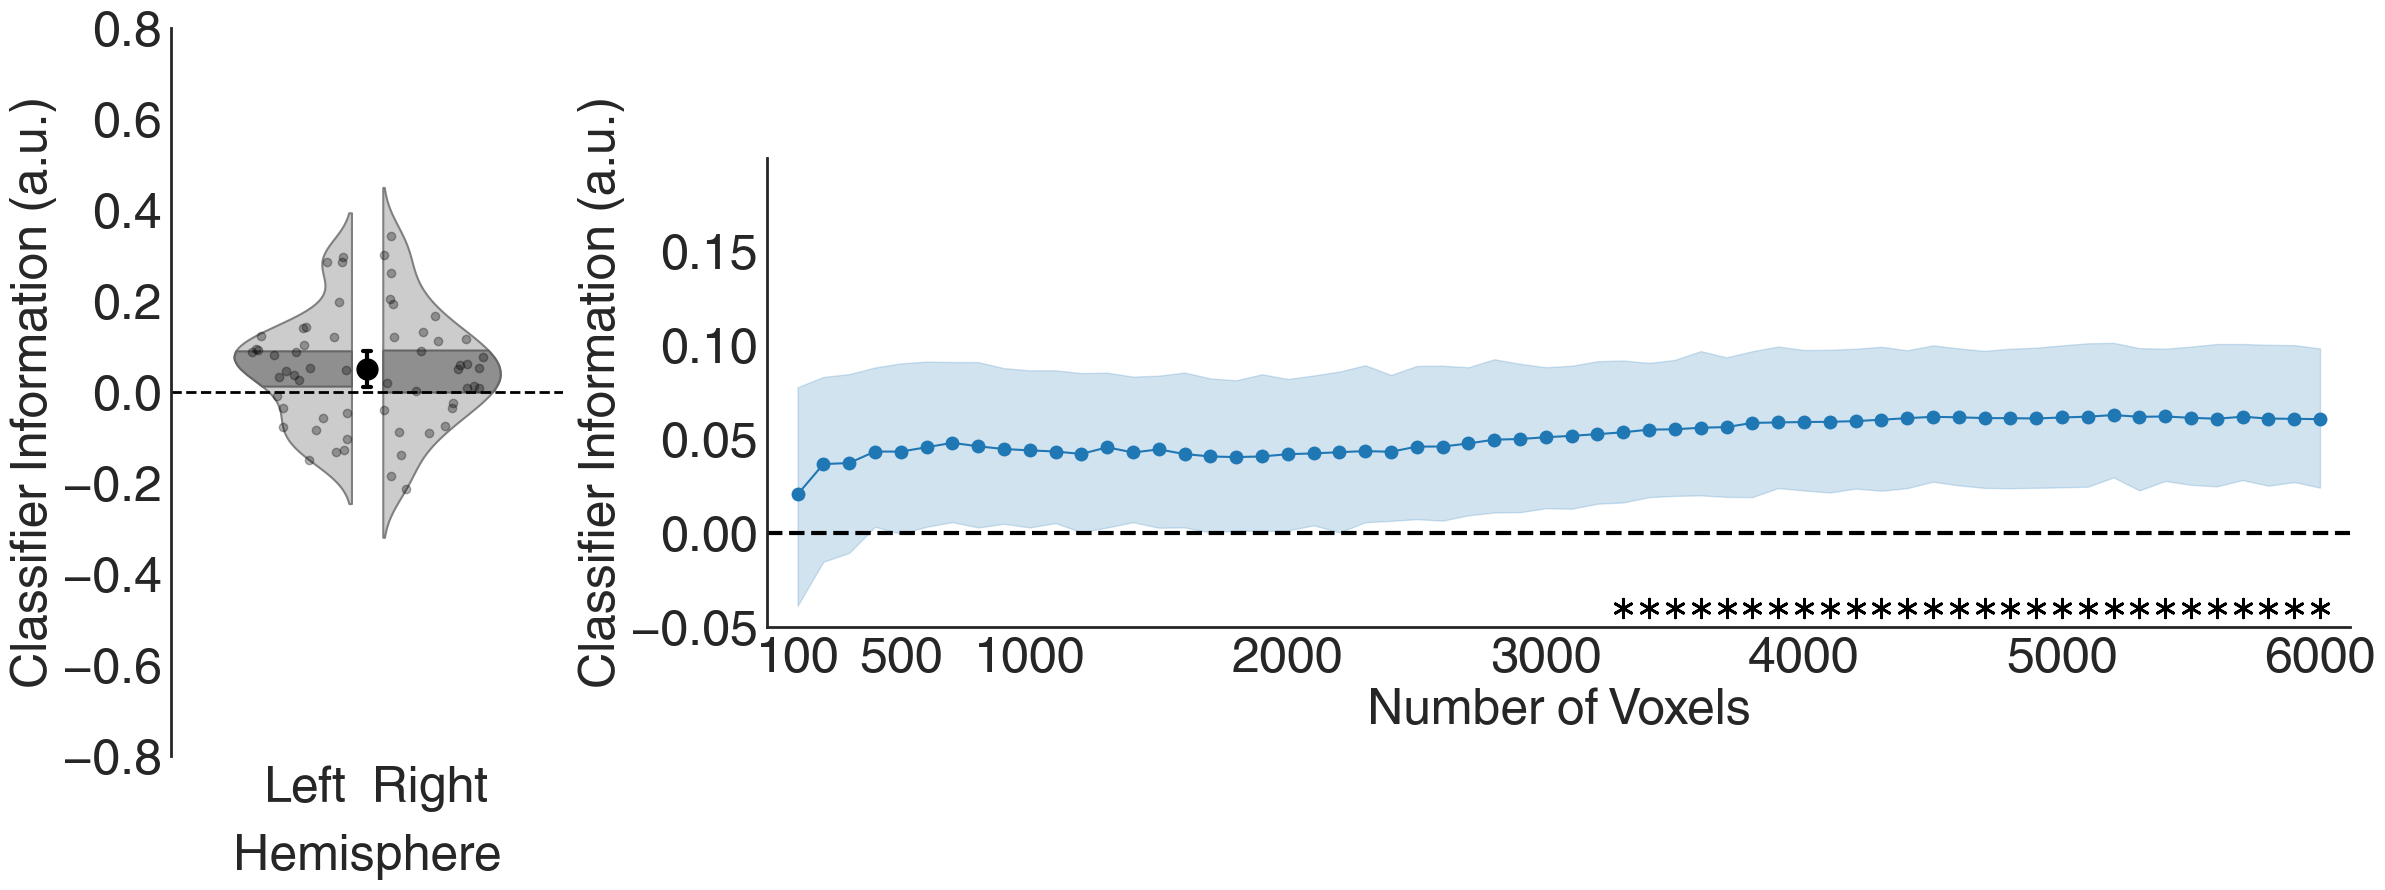

In [74]:
_ = plot_by_nvoxels(exp2_lvc_res, experiment=2, n_perms=10000, right_part=True)